# Regression Phase 10 : Predicting hotel prices using k-nearest neighbors regression


We will implement k-nearest neighbors regression and then predict housing price

* Find the k-nearest neighbors of a given query input
* Predict the output for the query input using the k-nearest neighbors
* Choose the best value of k using a validation set

# Fire up GraphLab Create

In [2]:
import graphlab


# Load in hotels data in NY


In [4]:
hotels = graphlab.SFrame('NY.csv') # Chicago.csv
hotels['price'] = hotels['price'].astype(float)
hotels['rates'] = hotels['rates'].astype(float)
hotels['zipcode'] = hotels['zipcode'].astype(float)
hotels['guests'] = hotels['guests'].astype(float)

#hotels = hotels[hotels['size'] < 1500] 
hotels = hotels[hotels['price'] > 10]
hotels

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1492854037.log


This non-commercial license of GraphLab Create for academic use is assigned to dchen@albany.edu and will expire on November 05, 2017.


Finished parsing file /Users/Peter/NY.csv

Parsing completed. Parsed 100 lines in 0.199715 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,float,float,str,str,str,str,int,int,str,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Peter/NY.csv

Parsing completed. Parsed 26382 lines in 0.190345 secs.

name,zone,zipcode,star,rating,rates,checkin,checkout
Courtyard New YorkDowntown Manhattan/World ...,Wall Street - FinancialDistrict ...,10006.0,3.0,4.3,46.0,04/21/2017,04/22/2017
Courtyard New YorkDowntown Manhattan/World ...,Wall Street - FinancialDistrict ...,10006.0,3.0,4.3,46.0,04/21/2017,04/22/2017
Courtyard New YorkDowntown Manhattan/World ...,Wall Street - FinancialDistrict ...,10006.0,3.0,4.3,46.0,04/21/2017,04/22/2017
Courtyard New YorkDowntown Manhattan/World ...,Wall Street - FinancialDistrict ...,10006.0,3.0,4.3,46.0,04/21/2017,04/22/2017
Courtyard New YorkDowntown Manhattan/World ...,Wall Street - FinancialDistrict ...,10006.0,3.0,4.3,46.0,04/21/2017,04/22/2017
Courtyard New YorkDowntown Manhattan/World ...,Wall Street - FinancialDistrict ...,10006.0,3.0,4.3,46.0,04/21/2017,04/22/2017
Park Lane Hotel,Central Park,10019.0,4.0,4.0,6.0,04/21/2017,04/22/2017
Park Lane Hotel,Central Park,10019.0,4.0,4.0,6.0,04/21/2017,04/22/2017
Park Lane Hotel,Central Park,10019.0,4.0,4.0,6.0,04/21/2017,04/22/2017
The Belvedere Hotel,Broadway - Times Square,10036.0,3.5,4.2,16.0,04/21/2017,04/22/2017


# Import useful functions from previous notebooks

To efficiently compute pairwise distances among data points, we will convert the SFrame into a 2D Numpy array. First import the numpy library and then copy and paste get_numpy_data() from previous phase.

In [5]:
import numpy as np # note this allows us to refer to numpy as np instead

In [6]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how we add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how we combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

We will also need the normalize_features() function from last phase that normalizes all feature columns to unit norm.


In [7]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix/norms
    return (normalized_features, norms)

# Split data into training, test, and validation sets


In [8]:
(train_and_validation, test) = hotels.random_split(.8, seed=1) # initial train/test split
(train, validation) = train_and_validation.random_split(.8, seed=1) # split training set into training and validation sets

# Extract features and normalize


Using all of the numerical inputs listed in feature_list, transform the training, test, and validation SFrames into Numpy arrays:


In [10]:
feature_list = ['star',  
                'zipcode',
                'rating',
                'rates',
                'size',
                'guests'
               ]
features_train, output_train = get_numpy_data(train, feature_list, 'price')
features_test, output_test = get_numpy_data(test, feature_list, 'price')
features_valid, output_valid = get_numpy_data(validation, feature_list, 'price')

features_train.shape

(16032, 7)

In computing distances, it is crucial to normalize features. Otherwise, for example, the size feature (typically on the order of some hundreds) would exert a much larger influence on distance than the star feature (typically on the order of 1 to 5). We divide each column of the training feature matrix by its 2-norm, so that the transformed column has unit norm.


IMPORTANT: Make sure to store the norms of the features in the training set. The features in the test and validation sets must be divided by these same norms, so that the training, test, and validation sets are normalized consistently.


In [11]:
features_train, norms = normalize_features(features_train) # normalize training set features (columns)
features_test = features_test / norms # normalize test set by training set norms
features_valid = features_valid / norms # normalize validation set by training set norms

# Compute a single distance


To start, let's just explore computing the "distance" between two given hotels. We will take our query hotel to be the first hotel of the test set and look at the distance between this hotel and the 10th hotel of the training set.

To see the features associated with the query hotel, print the first row (index 0) of the test feature matrix. We should get an 7-dimensional vector whose components are between 0 and 1.



In [12]:
print features_train[0]

[ 0.0078978   0.0061482   0.00778925  0.00815447  0.00104722  0.005413
  0.00510591]


Now print the 10th row (index 9) of the training feature matrix. Again, We will get an 18-dimensional vector with components between 0 and 1.


In [21]:
print features_train[9]

[  7.89780030e-03   9.22229419e-03   7.79703122e-03   8.53374563e-03
   2.27656086e-05   6.65025561e-03   5.10591332e-03]


Euclidean distance: $distance(x_j, x_q) \sqrt{a_1(x_j[1]-x_q[1])^2 + ... + a_d(x_j[d]-x_q[d])^2)}$

In [31]:
euclidean_distance = np.sqrt(np.sum((features_train[9]-features_test[0])**2))
print euclidean_distance

0.00154963483067


# Compute multiple distances

Of course, to do nearest neighbor regression, we need to compute the distance between our query hotel and all hotels in the training set.

To visualize this nearest-neighbor search, let's first compute the distance from our query hotel (features_test[0]) to the first 10 hotels of the training set (features_train[0:10]) and then search for the nearest neighbor within this small set of hotels. Through restricting ourselves to a small set of hotels to begin with, we can visually scan the list of 10 distances to verify that our code for finding the nearest neighbor is working.

Write a loop to compute the Euclidean distance from the query hotel to each of the first 10 hotels in the training set.


In [33]:
dist_dict = {}
for i in range(0,10):
    dist_dict[i] = np.sqrt(np.sum((features_train[i]-features_test[0])**2))
    print (i,dist_dict[i])

(0, 0.0029938800143947362)
(1, 0.0029938800143947362)
(2, 0.0029938800143947362)
(3, 0.0029938800143947362)
(4, 0.0029115512871671079)
(5, 0.0029115512871671079)
(6, 0.00041978357644218475)
(7, 0.00041978357644218475)
(8, 0.0052711777898176012)
(9, 0.001549634830669752)


In [35]:
#get the smalles value in a dictionary
print min(dist_dict.items(), key = lambda x: x[1])

(6, 0.00041978357644218475)


It is computationally inefficient to loop over computing distances to all hotels in our training dataset. Fortunately, many of the Numpy functions can be vectorized, applying the same operation over multiple values or vectors. 

Consider the following loop that computes the element-wise difference between the features of the query hotels (features_test[0]) and the first 3 training hotels (features_train[0:3]):

In [38]:
for i in xrange(3):
    print features_train[i]-features_test[0]
    # should print 3 vectors of length 7
print "##########################################################"
print features_train[0:3]
print "##########################################################"
print features_test[0]
print "##########################################################"

[  0.00000000e+00  -2.04939871e-03  -1.01199487e-05   5.68916375e-04
   9.10624343e-04  -1.90007303e-03   0.00000000e+00]
[  0.00000000e+00  -2.04939871e-03  -1.01199487e-05   5.68916375e-04
   9.10624343e-04  -1.90007303e-03   0.00000000e+00]
[  0.00000000e+00  -2.04939871e-03  -1.01199487e-05   5.68916375e-04
   9.10624343e-04  -1.90007303e-03   0.00000000e+00]
##########################################################
[[ 0.0078978   0.0061482   0.00778925  0.00815447  0.00104722  0.005413
   0.00510591]
 [ 0.0078978   0.0061482   0.00778925  0.00815447  0.00104722  0.005413
   0.00510591]
 [ 0.0078978   0.0061482   0.00778925  0.00815447  0.00104722  0.005413
   0.00510591]]
##########################################################
[ 0.0078978   0.00819759  0.00779937  0.00758555  0.00013659  0.00731307
  0.00510591]
##########################################################


In [39]:
#Vectorize the data 
print features_train[0:3] - features_test[0]

[[  0.00000000e+00  -2.04939871e-03  -1.01199487e-05   5.68916375e-04
    9.10624343e-04  -1.90007303e-03   0.00000000e+00]
 [  0.00000000e+00  -2.04939871e-03  -1.01199487e-05   5.68916375e-04
    9.10624343e-04  -1.90007303e-03   0.00000000e+00]
 [  0.00000000e+00  -2.04939871e-03  -1.01199487e-05   5.68916375e-04
    9.10624343e-04  -1.90007303e-03   0.00000000e+00]]


Note that the output of this vectorized operation is identical to that of the loop above, which can be verified below:


In [40]:
# verify that vectorization works
results = features_train[0:3] - features_test[0]
print results[0] - (features_train[0]-features_test[0])
# should print all 0's if results[0] == (features_train[0]-features_test[0])
print results[1] - (features_train[1]-features_test[0])
# should print all 0's if results[1] == (features_train[1]-features_test[0])
print results[2] - (features_train[2]-features_test[0])
# should print all 0's if results[2] == (features_train[2]-features_test[0])

[ 0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.]


Write tests whenever we are vectorizing a complicated operation.


# Perform 1-nearest neighbor regression

Now that we have the element-wise differences, it is not too hard to compute the Euclidean distances between our query hotel and all of the training hotels. 

First, def a single-line expression to define a variable diff such that diff[i] gives the element-wise difference between the features of the query hotel and the i-th training hotel.


In [41]:
diff = features_train - features_test[0]
diff

array([[  0.00000000e+00,  -2.04939871e-03,  -1.01199487e-05, ...,
          9.10624343e-04,  -1.90007303e-03,   0.00000000e+00],
       [  0.00000000e+00,  -2.04939871e-03,  -1.01199487e-05, ...,
          9.10624343e-04,  -1.90007303e-03,   0.00000000e+00],
       [  0.00000000e+00,  -2.04939871e-03,  -1.01199487e-05, ...,
          9.10624343e-04,  -1.90007303e-03,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,  -1.02469935e-03,   1.03924088e-03, ...,
          9.37943074e-03,  -1.90007303e-03,   5.10591332e-03],
       [  0.00000000e+00,  -1.02469935e-03,   1.03924088e-03, ...,
          9.37943074e-03,  -1.90007303e-03,   5.10591332e-03],
       [  0.00000000e+00,  -1.02469935e-03,   1.03924088e-03, ...,
          9.37943074e-03,  -1.90007303e-03,   5.10591332e-03]])

To test the code above, run the following cell, which should output a value 0.012599812555:

In [43]:
print diff[-1].sum() # sum of the feature differences between the query and last training hotel
# should print 0.012599812555

0.012599812555


The next step in computing the Euclidean distances is to take these feature-by-feature differences in diff, square each, and take the sum over feature indices. That is, compute the sum of square feature differences for each training hotel (row in diff).

By default, np.sum sums up everything in the matrix and returns a single number. To instead sum only over a row or column, we need to specifiy the axis parameter described in the np.sum documentation. In particular, axis = 1 computes the sum across each row.

Below, we compute this sum of square feature differences for all training hotel and verify that the output for the 16th hotel in the training set is equivalent to having examined only the 16th row of diff and computing the sum of squares on that row alone.

In [44]:
print np.sum(diff**2, axis=1)[15] # take sum of squares across each row, and print the 16th sum
print np.sum(diff[15]**2) # print the sum of squares for the 16th row -- should be same as above

1.59037865082e-05
1.59037865082e-05


compute the Euclidean distances between the query hotel and all hotels in the training set. Assign the result to a variable distances.


In [45]:
distances = np.sqrt(np.sum(diff**2, axis =1))
print len(distances)

16032


In [46]:
print distances[100] # Euclidean distance between the query hotel and the 101th training hotel
# should print 0.00225364957223

0.00225364957223


Now we are ready to write a function that computes the distances from a query hotel to all training hotels. 

The function should take two parameters:
(i) the matrix of training features and 
(ii) the single feature vector associated with the query.


In [47]:
def get_1NN(train_matrix,query_vector):
    diff = train_matrix - query_vector
    distances = np.sqrt(np.sum(diff**2, axis =1))
    return distances

As a test to the 1NN, we will take the query hotel to be third hotel of the test set (features_test[2]). 
We want to find the index of the hotel in the training set that is closest to this query hotel.

Then we can find the predicted value of the query hotel based on 1-nearest neighbor regression.

In [83]:
third_hotel_distance = get_1NN(features_train, features_test[2])
print third_hotel_distance.argsort()[:1], min(third_hotel_distance)

[8919] 0.0


It is the exact same hotel, because the crawling data always crawled some different rooms from the same hotel, so there would always be some hotel in the train data that can match the test data 

In [84]:
print np.argsort(third_hotel_distance, axis = 0)[:4]

[8919 4102 7635   10]


In [85]:
#use the index to predict the eaxt value of that query!
print output_train[8919]

309.0


# Perform k-nearest neighbor regression

For k-nearest neighbors, we need to find a set of k hotels in the training set closest to a given query hotel. We then make predictions based on these k nearest neighbors.


# Fetch k-nearest neighbors


Using the functions above, implement a function that takes in
    * the value of k;
    * the feature matrix for the training hotels; and
    * the feature vector of the query hotel

and returns the indices of the k closest training hotels. For instance, with 2-nearest neighbor, a return value of [5, 10] would indicate that the 6th and 11th training hotels are closest to the query hotel.

In [86]:
def get_kNN(k,train_matrix,query_vector):
    distances = get_1NN(train_matrix,query_vector)
    return np.argsort(distances, axis =0)[:k]

In [87]:
# Test

In [89]:
print get_kNN(10, features_train, features_test[2])

[ 8919  4102  7635    10  6356  8918  7634     9 14996   336]


# Make a single prediction by averaging k nearest neighbor outputs


Now that we know how to find the k-nearest neighbors, write a function that predicts the value of a given query hotel. For simplicity, take the average of the prices of the k nearest neighbors in the training set. The function should have the following parameters:

    * the value of k;
    * the feature matrix for the training hotels;
    * the output values (prices) of the training hotels; and
    * the feature vector of the query hotel, whose price we are predicting.

The function should return a predicted value of the query hotel.


In [90]:
def get_kNN_avg(k,features_train, output_values, query_vector):
    k_neighbors = get_kNN(k, features_train, query_vector)
    avg_predict = np.mean(output_values[k_neighbors])
    return avg_predict

In [97]:
print get_kNN_avg(4, features_train, output_train, features_test[2])

321.25


# Make multiple predictions


Write a function to predict the value of each and every hotel in a query set. (The query set can be any subset of the dataset, be it the test set or validation set.) The idea is to have a loop where we take each hotel in the query set as the query hotel and make a prediction for that specific hotel. The new function should take the following parameters:


   * the value of k;
   * the feature matrix for the training hotels;
   * the output values (prices) of the training hotels; and
   * the feature matrix for the query set.

The function should return a set of predicted values, one for each hotels in the query set.

In [99]:
def get_kNN_avg_multiVector(k, features_train, output_values,query_matrix):
    num_of_rows = query_matrix.shape[0]
    predicted_values = []
    for i in xrange(num_of_rows):
        avg_predict = get_kNN_avg(k,features_train,output_values,query_matrix[i])
        predicted_values.append(avg_predict)
    return predicted_values

## Test :
Make predictions for the first 10 hotels in the test set using k-nearest neighbors with k = 10.

In [103]:
predicted_values =  get_kNN_avg_multiVector(10, features_train, output_train, features_test[0:10])
print predicted_values
print '###############################################'
print predicted_values.index(min(predicted_values))
print min(predicted_values)
print '###############################################'
print predicted_values.index(max(predicted_values))
print max(predicted_values)


[289.5, 240.09999999999999, 276.0, 421.69999999999999, 270.80000000000001, 216.0, 215.80000000000001, 270.5, 191.69999999999999, 370.5]
###############################################
8
191.7
###############################################
3
421.7


# Choosing the best value of k using a validation set


There remains a question of choosing the value of k to use in making predictions. Here, we use a validation set to choose this value. Write a loop that does the following:


* For k in [1, 2, ..., 15]:
    * Makes predictions for each hotel in the VALIDATION set using the k-nearest neighbors from the TRAINING set.
    * Computes the RSS for these predictions on the VALIDATION set
    * Stores the RSS computed above in rss_all
* Report which k produced the lowest RSS on VALIDATION set.

In [104]:
rss_all = []
for k in range(1,16):    
    predict_value = get_kNN_avg_multiVector(k, features_train, output_train, features_valid)
    residual = (output_valid - predict_value)
    rss = sum(residual**2)
    rss_all.append(rss)

In [105]:
print rss_all
print rss_all.index(min(rss_all))

[46014631.0, 34789473.25, 33339837.999999695, 32552208.25, 31771139.439999998, 31541237.805555243, 31377964.612244893, 31143042.375, 31316216.061728265, 31247863.840000082, 31270448.570247889, 31502008.840277415, 31774775.408283975, 32094065.96938771, 32517043.359999854]
7


To visualize the performance as a function of k, plot the RSS on the VALIDATION set for each considered k value:

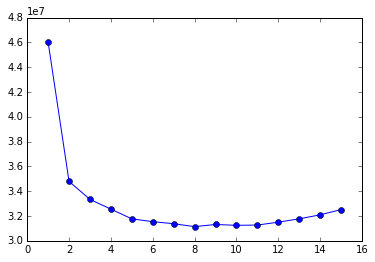

In [106]:

import matplotlib.pyplot as plt
%matplotlib inline

kvals = range(1, 16)
plt.plot(kvals, rss_all,'bo-')

Compute the RSS on the TEST data using the value of k found above -- sum over all hotels in the TEST set.

In [107]:
predict_value = get_kNN_avg_multiVector(7, features_train, output_train, features_test)
residual = (output_test - predict_value)
rss = sum(residual**2)
print rss

39329030.7143
